# Play Ball

1. Lees het bestand playball.csv.
Deze tabel laat toe om te beslissen of er een wedstrijd gespeeld zal worden, afhankelijk van de weersomstandigheden.
Deze dataset is al omgezet naar nominale meetwaarden.

In [1]:
import numpy as np
import pandas as pd

playBall = pd.read_csv('data/playBall.csv')
display(playBall)

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


2. Bereken de entropie van deze tabel.  Schrijf ook de formule op.


In [2]:
def entropy(series: pd.Series):
    vc = series.value_counts(normalize=True, sort=False)
    return -(vc * np.log2(vc)).sum()

E_ouder = entropy(playBall.Play)
print('Entropy, E(S) =', E_ouder)
print("\n")
E_ouder = playBall.apply(entropy)
print(E_ouder)

Entropy, E(S) = 0.9402859586706311


Outlook        1.577406
Temperature    1.556657
Humidity       1.000000
Wind           0.985228
Play           0.940286
dtype: float64


3. Bereken de gain voor iedere kolom.  Schrijf telkens de formule op.

In [3]:
def information_gain(parent_table: pd.DataFrame, attribute: str, target: str):
    # bepaal entropie van parent table
    entropy_parent = entropy(parent_table[target])
    child_entropies = []
    child_weights = []

    # bereken entropies of child tables
    for (label, fraction) in parent_table[attribute].value_counts().items():
        child_df = parent_table[parent_table[attribute] == label]
        child_entropies.append(entropy(child_df[target]))
        child_weights.append(int(fraction))

    # calculate the difference between parent entropy and weighted child entropies
    return entropy_parent - np.average(child_entropies, weights=child_weights)

IG_Outlook = information_gain(playBall, 'Outlook', 'Play')
IG_Temperature= information_gain(playBall, 'Temperature', 'Play')
IG_Humidity = information_gain(playBall, 'Humidity', 'Play')
IG_Wind = information_gain(playBall, 'Wind', 'Play')

print("Initiële Information Gain voor alle kolommen")
print("Outlook: ", IG_Outlook)
print("Temperature: ", IG_Temperature)
print("Humidity: ", IG_Humidity)
print("Wind: ", IG_Wind)

Initiële Information Gain voor alle kolommen
Outlook:  0.24674981977443922
Temperature:  0.02922256565895487
Humidity:  0.1518355013623417
Wind:  0.04812703040826949


4. Welke kolom kies je voor de eerste node?

In [4]:
# Outlook

5. Bepaal handmatig de rest van de boomstructuur en bepaal voor iedere node de entropie van de overeenkomstige tabel

In [5]:
# Ik zie hier de meerwaarde niet in van deze vraagstelling. Dit is pure bezigheidstherapie.

6. Maak de boomstructuur ook eens met Python.

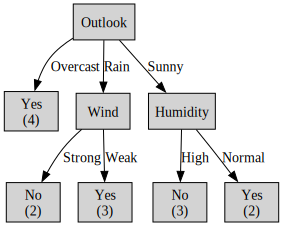

In [6]:
import graphviz
from id3 import Id3Estimator, export_graphviz

X = playBall.drop(columns=['Play'], axis=1)
y = playBall['Play']

model = Id3Estimator()

# Bouw het model
model.fit(X, y)

# maak model
model_tree = export_graphviz(model.tree_, feature_names=X.columns)
# toon beslissingsboom
graphviz.Source(model_tree.dot_tree)

7. Maak nu een voorspelling? Wordt er gespeeld bij volgende weersomstandigheden?
 * Outlook = Sunny
 * Temperature = Mild
 * Humidity = High
 * Wind = Weak

In [7]:
# Voorspelling:
voorspelling = np.array([['Sunny', 'Mild', 'High', 'Weak']])
print(model.predict(voorspelling)) # "No"

['No']
